<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/6%EC%A3%BC%EC%B0%A8/%EC%9E%AC%EB%B0%B0%ED%99%98%EA%B2%BD_%EB%B3%84_%EC%9E%91%EB%AC%BC_%EC%A2%85%EB%A5%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [4]:
!kaggle competitions download -c 2021-ai-w4-p2

  0% 0.00/32.6k [00:00<?, ?B/s]
100% 32.6k/32.6k [00:00<00:00, 27.3MB/s]
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 36.2MB/s]
  0% 0.00/6.35k [00:00<?, ?B/s]
100% 6.35k/6.35k [00:00<00:00, 6.38MB/s]


In [25]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample.csv')

In [6]:
train.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,22,36,16,30.581395,50.771481,8.184229,64.585596,mothbeans
1,18,27,41,22.365094,92.308824,7.175344,104.821633,pomegranate
2,61,68,50,35.214628,91.497251,6.793245,243.074507,papaya
3,26,72,22,28.767949,37.577921,4.674942,91.720849,pigeonpeas
4,2,140,197,22.697801,92.822234,5.534567,105.050823,apple


In [7]:
test.head()

,N,P,K,temperature,humidity,ph,rainfall
0,101,17,47,29.494014,94.729813,6.185053,26.308209
1,98,8,51,26.179346,86.522581,6.259336,49.430510
2,59,62,49,43.360515,93.351916,6.941497,114.778071
3,44,60,55,34.280461,90.555616,6.825371,98.540477
4,30,137,200,22.914300,90.704756,5.603413,118.604465


In [8]:
sample

,id,label
0,0,coffee
1,1,coffee
2,2,coffee
3,3,coffee
4,4,coffee
...,...,...
545,545,coffee
546,546,coffee
547,547,coffee
548,548,coffee


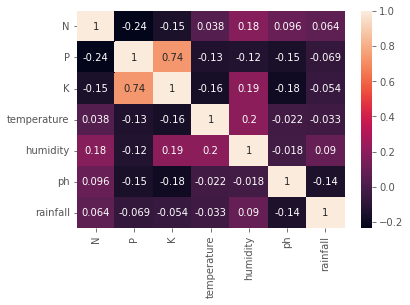

In [11]:
sns.heatmap(train.corr(),annot=True)

In [26]:
x_train=train.drop('label',axis=1)
y_train=train['label']
x_test=test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(1650, 7)
(1650,)
(550, 7)


In [27]:
# ================================================================================================
# version2에 사용할 encoder table 생성하는 법
# ================================================================================================
encodertable = {} # encoder table 변수 선언. table은 python dictionary 자료형을 사용해보겠습니다.
reverse_encodertable = {} # 역변환을 위한 table 입니다
print(type(y_train)) # pandas의 Series 형식인 y_train에서
print(type(y_train.values)) # label데이터인 values를 꺼내옵니다. ({Series data}.values)
# 이후, y_train의 값에서 중복을 제거하여 고유한 label을 확인합니다. python list를 set(집합) 형식으로 바꾸어주면 됩니다
print( '편의를 위해서 ',type(set(y_train.values)),'형식의 데이터를 다시 ', type(list(set(y_train.values))) , '타입으로 바꾸어 줍니다.' )
unique_label = list(set(y_train.values))
for idx, u_label in enumerate(unique_label): # python built-in 함수인 enumerate를 이용해 코드를 작성합니다. 참고 [https://docs.python.org/3/library/functions.html#enumerate]
    encodertable[u_label] = idx
    reverse_encodertable[idx] = u_label
    
# encoder table을 완성했습니다
print(encodertable)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
편의를 위해서  <class 'set'> 형식의 데이터를 다시  <class 'list'> 타입으로 바꾸어 줍니다.
{'mothbeans': 0, 'maize': 1, 'kidneybeans': 2, 'rice': 3, 'muskmelon': 4, 'watermelon': 5, 'orange': 6, 'mango': 7, 'papaya': 8, 'banana': 9, 'chickpea': 10, 'pomegranate': 11, 'pigeonpeas': 12, 'jute': 13, 'coffee': 14, 'mungbean': 15, 'apple': 16, 'grapes': 17, 'lentil': 18, 'coconut': 19, 'cotton': 20, 'blackgram': 21}


In [28]:
from sklearn.preprocessing import OrdinalEncoder
usevserion = 2 # table을 이용한 encoder를 사용하려면 2로, sklearn의 encoder를 사용하려면 1로 설정 해주세요.

if usevserion == 1:
    # Version 1 OrdinalEncoder를 사용하는 방법입니다.
    # =======================================================================================================================
    enc = OrdinalEncoder()  # encoder instance 선언
    y_train = enc.fit_transform(np.array(y_train).reshape(-1,1))
    #이후 학습을 위한 y_train data shape 변환
    y_train = y_train.squeeze()
    # =======================================================================================================================
elif usevserion == 2:
    # Version 2 직접 Encoding 을 진행하는 방법입니다.
    # =======================================================================================================================
    new_y_train=[]
    y_train = y_train.values
    for y_str in y_train:
        new_y_train.append(encodertable[y_str])
    del y_train
    y_train = np.array(new_y_train)
    # =======================================================================================================================

In [29]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
0,22,36,16,30.581395,50.771481,8.184229,64.585596
1,18,27,41,22.365094,92.308824,7.175344,104.821633
2,61,68,50,35.214628,91.497251,6.793245,243.074507
3,26,72,22,28.767949,37.577921,4.674942,91.720849
4,2,140,197,22.697801,92.822234,5.534567,105.050823
...,...,...,...,...,...,...,...
1645,10,5,5,21.213070,91.353492,7.817846,112.983436
1646,108,94,47,27.359116,84.546250,6.387431,90.812505
1647,11,36,31,27.920633,51.779659,6.475449,100.258567
1648,11,124,204,13.429886,80.066340,6.361141,71.400430


In [30]:
len(encodertable)

22

In [31]:
import torch
import torch.optim as optim

x_train=torch.FloatTensor(x_train.values.tolist())
y_train=torch.LongTensor(y_train)
x_test=torch.FloatTensor(x_test.values.tolist())

In [33]:
import torch
import torch.optim as optim
import torch.nn.functional as F

# 학습 변수 초기화
W = torch.zeros((7, 22), requires_grad = True)  # (Nx7) 의 데이터를 (Nx22)로
b = torch.zeros(22, requires_grad = True)
# W*X+b
# 변수 최적화를 위한 알고리즘, learning rate = 1
optimizer = optim.SGD([W,b], lr = 0.001)


np_epochs = 10000
for epoch in range(np_epochs + 1):
    # 가설 함수(모델). 다중 분류 모델이므로 softmax 함수
    hypothesis = F.softmax(x_train.matmul(W)+b, dim=1)
    
    ## cost 표현번 1번 예시
    #y_one_hot = torch.zeros(len(y_train), 22)
    #y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
    #cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
            
    ##cost 표현번 2번 예시
    cost = F.cross_entropy((x_train.matmul(W)+b), y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost:{:.6f}".format(epoch, np_epochs, cost.item()))
        
#1. cost가 수렴할때 까지

Epoch    0/10000 Cost:3.091042
Epoch  100/10000 Cost:0.843971
Epoch  200/10000 Cost:0.598537
Epoch  300/10000 Cost:0.491091
Epoch  400/10000 Cost:0.427089
Epoch  500/10000 Cost:0.383656
Epoch  600/10000 Cost:0.351832
Epoch  700/10000 Cost:0.327283
Epoch  800/10000 Cost:0.307634
Epoch  900/10000 Cost:0.291464
Epoch 1000/10000 Cost:0.277866
Epoch 1100/10000 Cost:0.266231
Epoch 1200/10000 Cost:0.256133
Epoch 1300/10000 Cost:0.247265
Epoch 1400/10000 Cost:0.239399
Epoch 1500/10000 Cost:0.232361
Epoch 1600/10000 Cost:0.226018
Epoch 1700/10000 Cost:0.220262
Epoch 1800/10000 Cost:0.215010
Epoch 1900/10000 Cost:0.210192
Epoch 2000/10000 Cost:0.205753
Epoch 2100/10000 Cost:0.201646
Epoch 2200/10000 Cost:0.197832
Epoch 2300/10000 Cost:0.194278
Epoch 2400/10000 Cost:0.190955
Epoch 2500/10000 Cost:0.187841
Epoch 2600/10000 Cost:0.184913
Epoch 2700/10000 Cost:0.182155
Epoch 2800/10000 Cost:0.179551
Epoch 2900/10000 Cost:0.177087
Epoch 3000/10000 Cost:0.174750
Epoch 3100/10000 Cost:0.172531
Epoch 32

## 모델 평가

In [34]:
hypothesis=F.softmax(x_train.matmul(W)+b,dim=1)
predict=torch.argmax(hypothesis,dim=1)

correct_prediction=predict.float()==y_train
accuracy=correct_prediction.sum().item()/len(correct_prediction)
print("The model has an accuracy of {:2.2f}% for the train set.".format(accuracy * 100))
print("맞은 예측 개수 ({}) / 전체 요소 개수 ({})".format(correct_prediction.sum().item(), len(correct_prediction)))

The model has an accuracy of 96.73% for the train set.
맞은 예측 개수 (1596) / 전체 요소 개수 (1650)


In [35]:
# 제출을 위한 test data 예측 
hypothesis = F.softmax(x_test.matmul(W) + b, dim=1)
predict = torch.argmax(hypothesis, dim=1)

if usevserion == 1:
    # Version 1 OrdinalEncoder를 사용하는 방법입니다.
    # =======================================================================================================================
    predict = enc.inverse_transform(predict.reshape(-1,1))
    # =======================================================================================================================
elif usevserion == 2:
    # Version 2 직접 Encoding 을 진행하는 방법입니다.
    # =======================================================================================================================
    new_predict = []
    for q in predict:
        new_predict.append(reverse_encodertable[q.item()])
    del predict
    predict = new_predict
    # =======================================================================================================================

sample['label'] = predict

In [36]:
sample.to_csv('sumbit.csv', index = False)